## Summary last classes

Finished with Pandas, second course:
- import data or create DataFrame
- access and modify parts of the DataFrame (loc,[...], )
- Visualization with pandas (matplotlib)

Last course:
- cleaning data
- Exploratory Data Analysis

In [1]:
# for the presentation it is better to use the full screen
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

### Data cleaning

In [2]:
import pandas as pd
import numpy as np

# load data from last course
df = pd.read_csv('data/auto.csv', index_col=0)
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [3]:
df.replace('?', np.nan, inplace=True)  # replace "?" to NaN

In [4]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
# convert to float
convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in convert:
    df[col] = df[col].astype('float64')

In [6]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Taking care of NaN values**

In [7]:
# replace by mean
rep_mean = ['normalized-losses', 'bore', 'stroke']
for col in rep_mean:
    df[col].replace(np.nan, df[col].mean(axis=0) , inplace=True)
    
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, 'four', inplace=True)

# simply drop whole row with NaN in "price" column
df.dropna(subset=['price', 'horsepower', 'peak-rpm'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)   # reset index, because we droped two rows

# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df['city-mpg']
df['highway-L/100km'] = 235/df['highway-mpg']

# drop not needed columns
df.drop('city-mpg', axis=1, inplace=True)
df.drop('highway-mpg', axis=1, inplace=True)

### EDA (Exploratory Data Analysis)

In [8]:
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.dpi'] = 90.

#### Numerical Variables

In [9]:
df.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  199.000000         199.000000  199.000000  199.000000  199.000000   
mean     0.839196         122.000000   98.824121  174.151256   65.882412   
std      1.257009          32.157441    6.090838   12.371905    2.110996   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          99.500000   94.500000  166.550000   64.100000   
50%      1.000000         122.000000   97.000000  173.200000   65.500000   
75%      2.000000         139.500000  102.400000  183.500000   66.700000   
max      3.000000         256.000000  120.900000  208.100000   72.000000   

           height  curb-weight  engine-size        bore      stroke  \
count  199.000000   199.000000   199.000000  199.000000  199.000000   
mean    53.775879  2556.030151   126.824121    3.329392    3.250411   
std      2.447039   519.855544    41.752932    0.269106    0.310926   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2157.000000    97.500000    3.150000    3.110000   
50%     54.100000  2414.000000   119.000000    3.310000    3.290000   
75%     55.550000  2930.500000   143.000000    3.585000    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm         price  city-L/100km  \
count         199.000000  199.000000   199.000000    199.000000    199.000000   
mean           10.178995  103.396985  5117.587940  13243.432161      9.941399   
std             4.022424   37.553843   480.521824   7978.707609      2.547219   
min             7.000000   48.000000  4150.000000   5118.000000      4.795918   
25%             8.550000   70.000000  4800.000000   7775.000000      7.833333   
50%             9.000000   95.000000  5200.000000  10345.000000      9.791667   
75%             9.400000  116.000000  5500.000000  16501.500000     12.368421   
max            23.000000  262.000000  6600.000000  45400.000000     18.076923   

       highway-L/100km  
count       199.000000  
mean          8.049623  
std           1.849417  
min           4.351852  
25%           6.911765  
50%           7.833333  
75%           9.400000  
max          14.687500

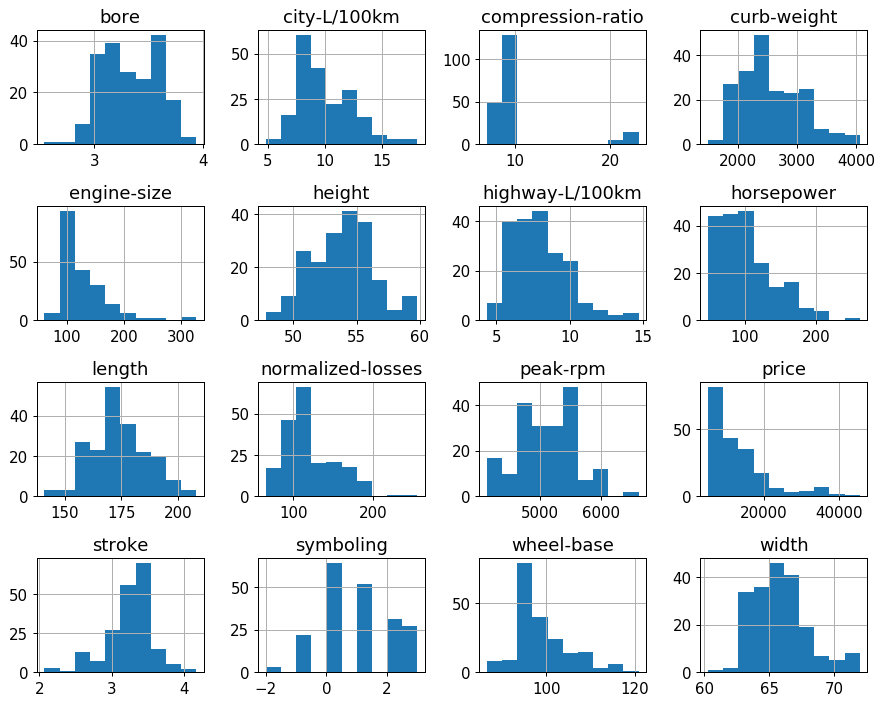

In [10]:
df.hist(figsize=(10, 8))
plt.tight_layout()

#### <font color=red>**Which features are important for the price?** Correlation and P-value
Which column has the highest influence on the price?

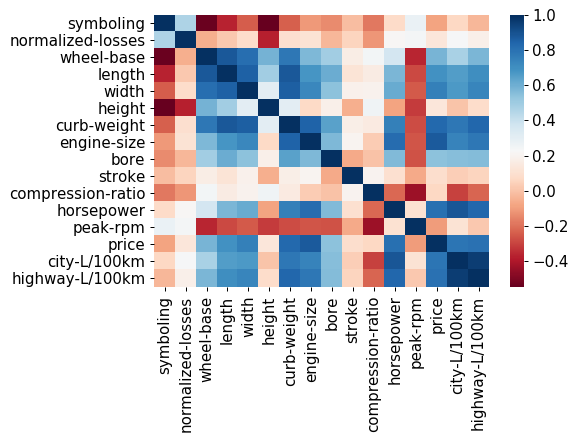

In [11]:
# df.corr()
sns.heatmap(df.corr(), cmap='RdBu');

Try the library heatmapz!

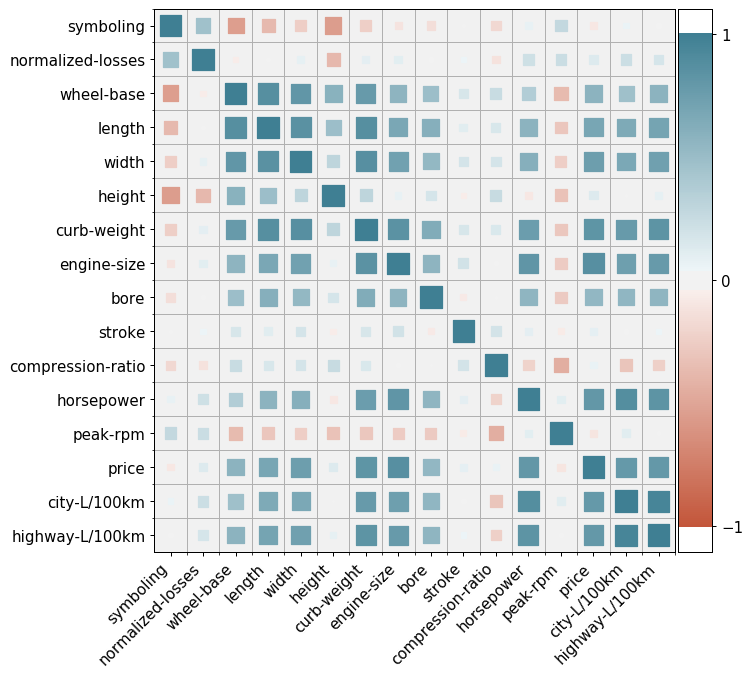

In [12]:
# !pip install heatmapz
from heatmap import heatmap, corrplot
plt.figure(figsize=(8, 8))
corrplot(df.corr(), size_scale=300);

In [13]:
high_corr = ['price',  'horsepower','length', 'width', 'curb-weight', 'engine-type',
             'peak-rpm','city-L/100km']

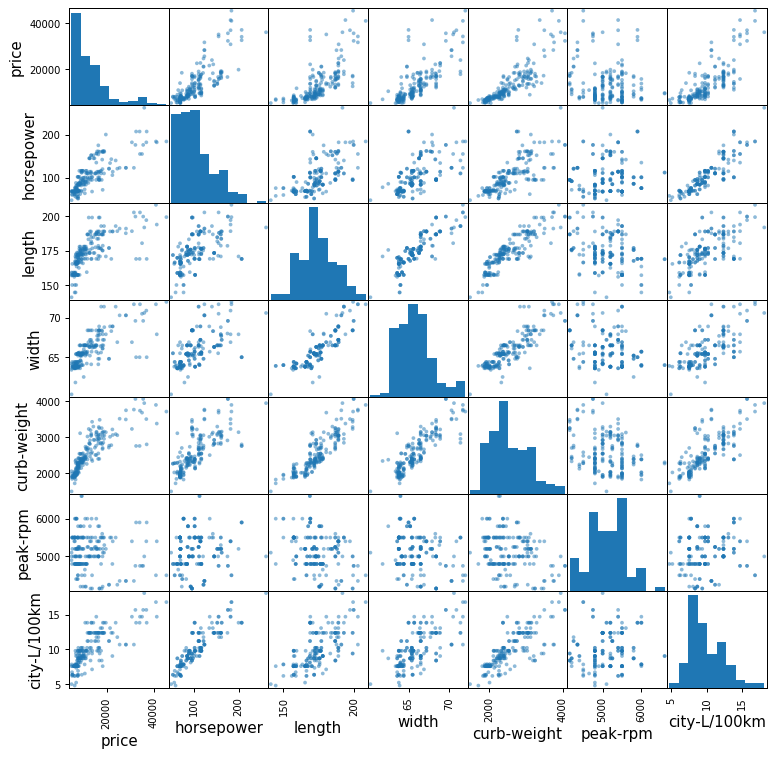

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[high_corr], figsize=(10, 10));

#### What to do with categorical data?

In [15]:
df.describe(include='object')

make fuel-type aspiration num-of-doors body-style drive-wheels  \
count      199       199        199          199        199          199   
unique      21         2          2            2          5            3   
top     toyota       gas        std         four      sedan          fwd   
freq        32       179        163          114         94          116   

       engine-location engine-type num-of-cylinders fuel-system  
count              199         199              199         199  
unique               2           6                7           8  
top              front         ohc             four        mpfi  
freq               196         143              155          90

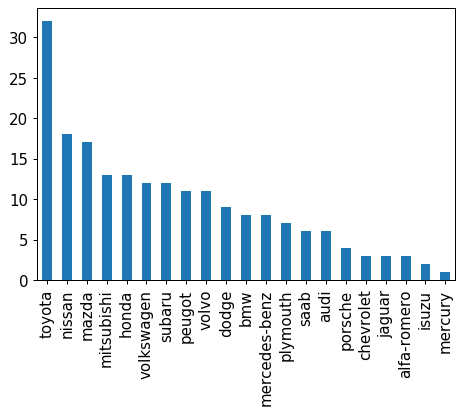

In [16]:
# plot a bar plot to visualize the distribution of each car brand in our data set
df['make'].value_counts().plot(kind='bar');

**Relationship between categorical variable and numerical**

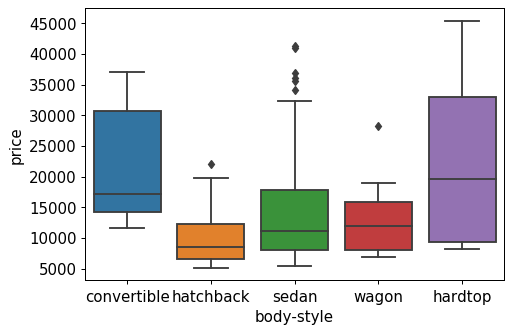

In [17]:
sns.boxplot(x="body-style", y="price", data=df);

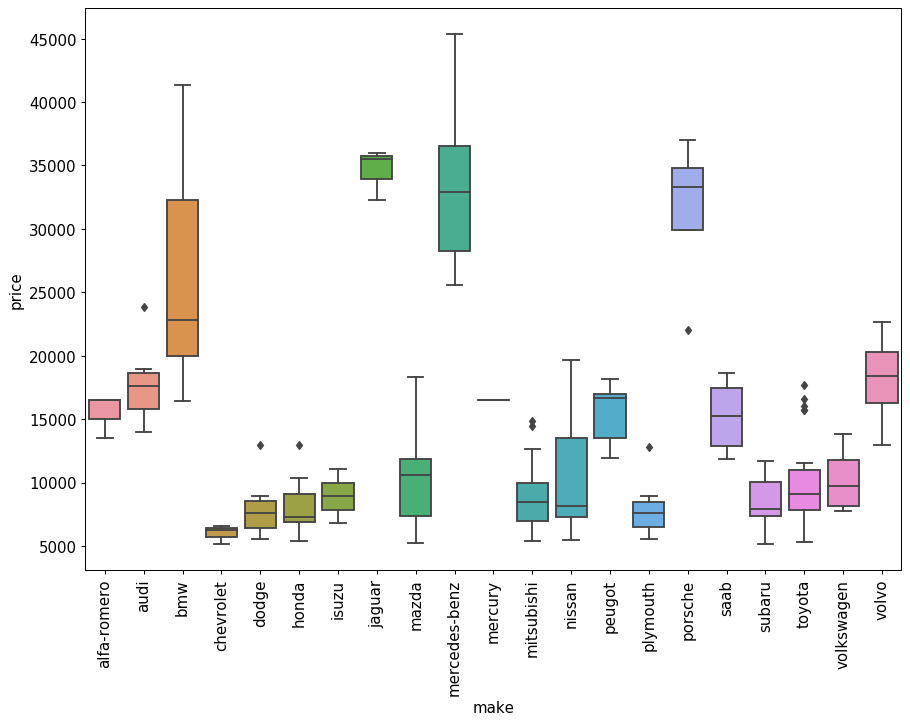

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x="make", y="price", data=df , ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

**Grouping**

In [19]:
df[['body-style','price']].groupby(['body-style']).mean()

price
body-style               
convertible  21890.500000
hardtop      22208.500000
hatchback     9958.373134
sedan        14459.755319
wagon        12500.166667

## Today Outlook
1. **API's (Google Trends)**
2. **NumPy**
3. **Matplotlib**
4. Scipy
5. Folium
6. **Google Places API**